In [1]:
import numpy as np
from plind.plmodel import plmodel
from plind.contour_dict import realcontour_1D
import matplotlib.pyplot as plt
import matplotlib.tri as mtri

%load_ext autoreload
%autoreload 2

In [7]:
def exponent(z, lamb):
    return 1j*lamb*z*z

def gradh(z, lamb):
    return 2*1j*lamb*np.conj(z)

In [8]:
# init model
lamb = 1
delta = 0.1
Nstep = 200
dt_init = 8e-3
thresh =-60
tmax = dt_init*400

critpts = [0]
domain = [-1,1]

contour = realcontour_1D(10,domain)

plind = plmodel(contour, exponent, grad=gradh, expargs=[lamb])

In [9]:
plind.descend(delta, thresh, tmax, dt_init)

/Users/DylanJow/wave_lensing_scint/plind/plind/descend/core.py:40: RuntimeWarning: divide by zero encountered in true_divide
  delta = np.min((np.divide(tol,2*R))**(1/4))


total steps: 45 current time: 3.2092092169787216


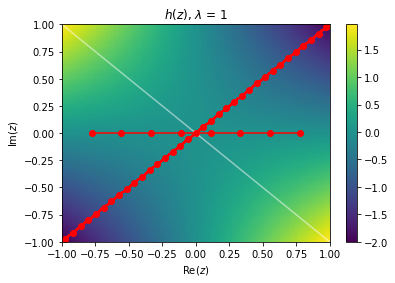

In [10]:
# Plot final contour and trajectory
N = 100
cont_space = 20
u, v = np.meshgrid(np.linspace(domain[0], domain[1], N), np.linspace(domain[0], domain[1], N), indexing='ij')
z = u + 1j*v

fig, ax = plt.subplots()
ax.set_title('$h(z)$, $\\lambda$ = {}'.format(lamb))
ax.set_xlabel("Re($z$)")
ax.set_ylabel("Im($z$)")
ax.set_ylim(domain[0], domain[1])
ax.set_xlim(domain[0], domain[1])
# Plot h
im = ax.pcolormesh(u, v, np.real(exponent(z, lamb)))
fig.colorbar(im, ax=ax)
for p0 in critpts:
    # Plot critical points
    ax.scatter(p0.real, p0.imag, color='w')
    # Plot contours of expfun.imag passing through p0, p1
    ax.contour(u, v, exponent(z, lamb).imag, [exponent(p0, lamb).imag], colors='w', alpha=0.5)
# Plot progress towards Lefschetz thimble
for k in np.linspace(0, plind.trajectory.shape[0], plind.trajectory.shape[0]//cont_space, endpoint=False):
    k = int(k)
    ax.plot(plind.trajectory[k].points.real[1:-1], plind.trajectory[k].points.imag[1:-1], 'ro-')
plt.show()

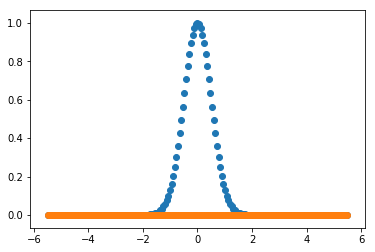

In [12]:
intfun = plind.get_intfun()

plt.figure()
plt.scatter(plind.contour.points.real, intfun(plind.contour.points, lamb).real)
plt.scatter(plind.contour.points.real, intfun(plind.contour.points, lamb).imag)
plt.show()